In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Techniques used for Feature Selection
### - Correlation Matrix with HeatMap
### - Univariate selection
### - Feature Importance

In [2]:
data = pd.read_csv('Mental_Health_PreProcessed Data.csv')

In [3]:
data.head()

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Treatment
0,46,1,44,1,1,3,0,1,1,2,...,4,1,1,2,2,1,2,2,1,0
1,36,1,14,1,1,3,4,1,1,1,...,2,1,1,1,1,0,0,0,0,0
2,29,1,44,0,1,3,1,0,1,2,...,1,0,1,1,1,1,1,1,0,1
3,31,1,44,1,0,0,0,1,1,1,...,1,1,1,1,1,1,0,2,0,0
4,46,1,44,0,0,1,2,1,1,2,...,0,0,1,1,2,1,0,1,0,1


### Correlation Matrix with HeatMap

In [4]:
corr_matrix = data.corr()
corr_matrix

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Treatment
Age,1.000000,0.080606,0.151929,0.074222,0.004418,-0.035247,0.025216,0.147640,-0.045870,0.150659,...,-0.010881,0.036120,-0.044506,-0.005559,0.004437,0.062735,-0.021663,-0.009229,0.060256,0.071211
Gender,0.080606,1.000000,-0.061652,0.054963,-0.118207,-0.043428,0.009573,0.009663,0.057754,-0.076270,...,0.052197,0.025683,0.016231,0.054377,0.073094,-0.044453,-0.028973,-0.002752,-0.024183,-0.133613
Country,0.151929,-0.061652,1.000000,-0.123163,0.057731,0.007785,0.097075,-0.014512,-0.035581,0.095027,...,-0.106498,-0.041344,-0.013375,-0.024803,0.003056,0.062082,-0.003358,-0.003281,-0.073251,0.069855
self_employed,0.074222,0.054963,-0.123163,1.000000,0.002918,-0.025693,-0.339003,0.317807,0.077259,-0.056206,...,0.167678,0.020519,0.014582,0.077654,0.038457,-0.025488,-0.026542,0.132138,0.068565,0.016820
family_history,0.004418,-0.118207,0.057731,0.002918,1.000000,0.106627,-0.047464,0.017819,-0.047258,0.122605,...,0.016598,0.023449,-0.003636,-0.009719,0.002176,0.046095,0.043846,0.044662,0.111236,0.376566
work_interfere,-0.035247,-0.043428,0.007785,-0.025693,0.106627,1.000000,-0.002024,0.016091,0.012652,-0.005884,...,0.005399,-0.002242,-0.042148,0.002079,-0.034071,0.059417,0.019125,0.011571,0.024501,0.131269
no_employees,0.025216,0.009573,0.097075,-0.339003,-0.047464,-0.002024,1.000000,-0.208213,-0.107414,0.119039,...,-0.090077,-0.004028,-0.067375,-0.087476,-0.055667,0.024062,0.029203,-0.025630,-0.011404,-0.047394
remote_work,0.147640,0.009663,-0.014512,0.317807,0.017819,0.016091,-0.208213,1.000000,0.133473,-0.066385,...,0.099256,0.058679,-0.009092,0.084838,0.025391,-0.045909,-0.025353,0.039768,-0.043472,0.025717
tech_company,-0.045870,0.057754,-0.035581,0.077259,-0.047258,0.012652,-0.107414,0.133473,1.000000,-0.043447,...,0.044377,0.001905,0.065600,0.069727,0.049590,-0.047693,-0.036574,0.021592,-0.058649,-0.031261
benefits,0.150659,-0.076270,0.095027,-0.056206,0.122605,-0.005884,0.119039,-0.066385,-0.043447,1.000000,...,0.064472,-0.011729,-0.033353,-0.010677,0.020662,0.031421,0.027568,0.143118,0.062418,0.221668


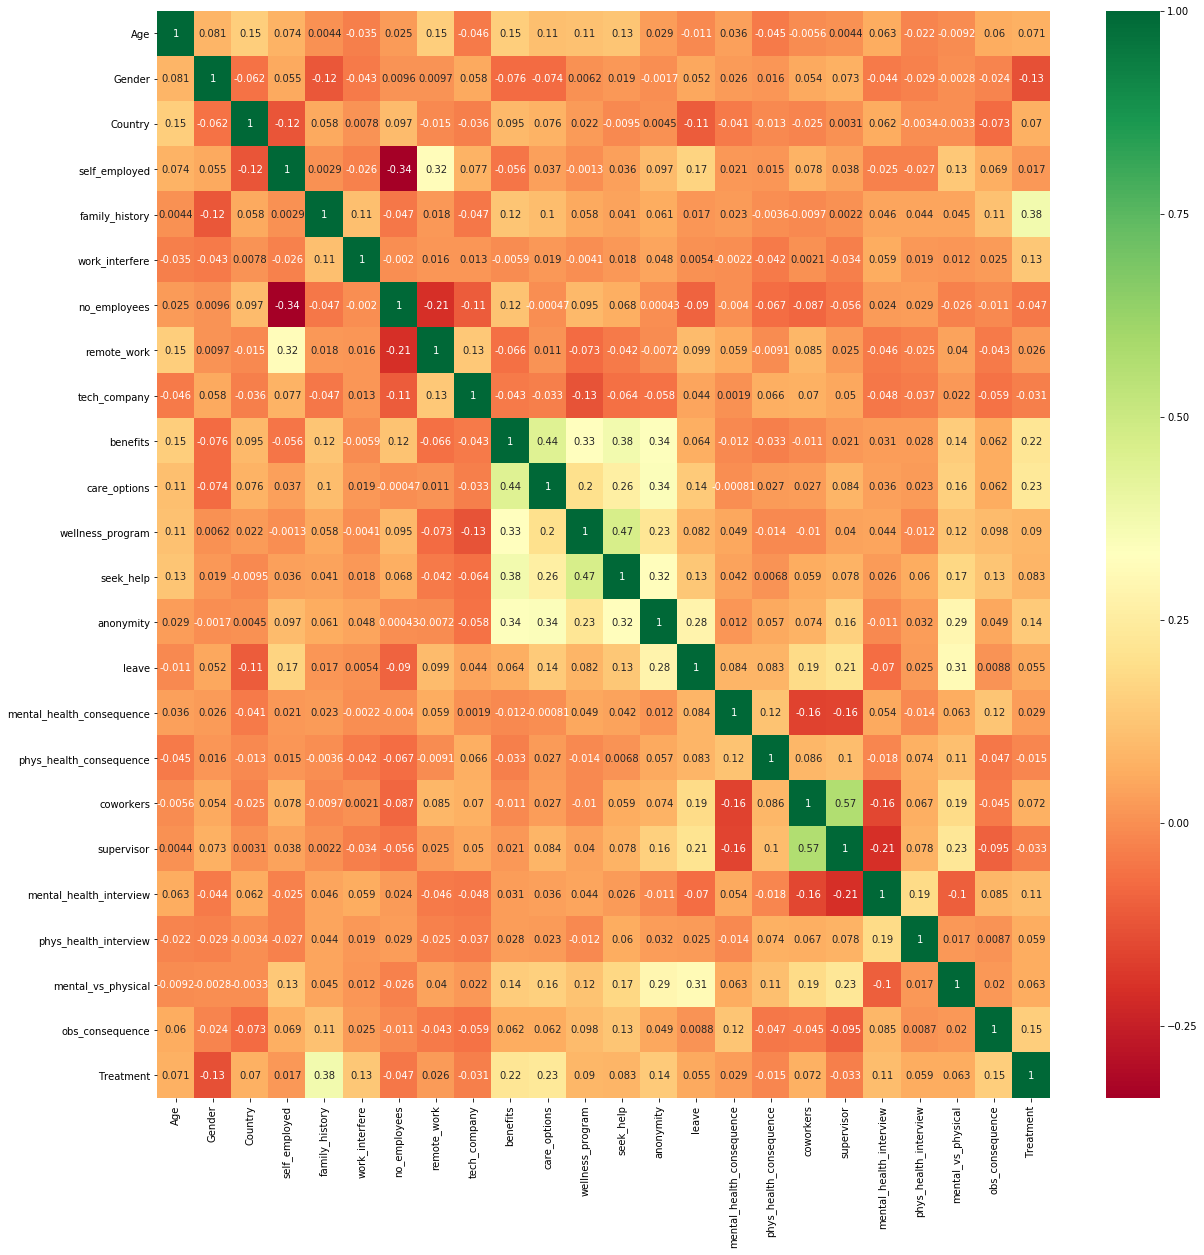

In [5]:
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Univariate Selection
- Statistical tests can be used to select those features that have the strongest relationship with the output variable.

In [6]:
X = data.iloc[:,0:23]
y = data.Treatment

In [7]:
#The chi-squared test is used to determine whether there is a significant difference 
#between the expected frequencies and the observed frequencies in one or more categories

In [8]:
bestFeature = SelectKBest(score_func=chi2)
fit = bestFeature.fit(X,y)
fit.scores_

array([9.55692798e+00, 4.93011062e+00, 2.83750865e+01, 3.08361242e-01,
       1.06493367e+02, 1.33197393e+01, 2.99432570e+00, 5.74048649e-01,
       2.17926793e-01, 4.02130929e+01, 5.34827458e+01, 3.16058945e+00,
       4.50234155e+00, 3.16434762e+01, 5.99055582e+00, 7.37099333e-01,
       7.79956594e-02, 2.48792442e+00, 8.64360595e-01, 2.78774145e+00,
       3.11917658e+00, 4.24269631e+00, 2.32052847e+01])

In [9]:
fscores = pd.DataFrame(fit.scores_)
fcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([fscores,fcolumns],axis=1)
featureScores.columns=['score','Specifations']
featureScores

,score,Specifations
0,9.556928,Age
1,4.930111,Gender
2,28.375087,Country
3,0.308361,self_employed
4,106.493367,family_history
5,13.319739,work_interfere
6,2.994326,no_employees
7,0.574049,remote_work
8,0.217927,tech_company
9,40.213093,benefits


In [10]:
featureScores.sort_values(by = 'score', ascending=False)

,score,Specifations
4,106.493367,family_history
10,53.482746,care_options
9,40.213093,benefits
13,31.643476,anonymity
2,28.375087,Country
22,23.205285,obs_consequence
5,13.319739,work_interfere
0,9.556928,Age
14,5.990556,leave
1,4.930111,Gender


In [11]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
feature_score = pd.DataFrame(model.feature_importances_)
feature_name = pd.DataFrame(X.columns)
feature_importance = pd.concat([feature_score,feature_name],axis=1)

In [13]:
feature_importance.columns = ['score','FeatureName']
feature_importance.sort_values('score',ascending=False)

,score,FeatureName
5,0.116583,work_interfere
0,0.111574,Age
4,0.097173,family_history
10,0.060756,care_options
6,0.055813,no_employees
2,0.050148,Country
14,0.047378,leave
9,0.044765,benefits
18,0.039973,supervisor
21,0.036067,mental_vs_physical


In [14]:
X = data.loc[:,['Age','Gender','family_history','work_interfere','no_employees','Country','care_options','mental_health_consequence','anonymity']]
y=data.Treatment

In [15]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler() 
X =  scaling.fit_transform(X)

In [16]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,2.007358,0.397365,1.249532,0.743428,-1.607348,0.542572,0.054382,0.194219,1.483338
1,0.577262,0.397365,1.249532,0.743428,0.692597,-1.732352,-1.100775,0.194219,1.483338
2,-0.423805,0.397365,1.249532,0.743428,-1.032362,0.542572,1.209540,-1.106204,0.384437
3,-0.137786,0.397365,-0.800300,-1.846307,-1.607348,0.542572,-1.100775,0.194219,1.483338
4,2.007358,0.397365,-0.800300,-0.983062,-0.457375,0.542572,1.209540,-1.106204,-0.714464
5,1.292310,0.397365,-0.800300,-1.846307,1.267583,0.542572,-1.100775,-1.106204,-0.714464
6,0.148233,0.397365,1.249532,-0.119817,-0.457375,0.542572,0.054382,0.194219,1.483338
7,0.434252,0.397365,1.249532,0.743428,1.267583,0.542572,1.209540,1.494642,0.384437
8,0.148233,0.397365,-0.800300,0.743428,-1.607348,0.542572,0.054382,-1.106204,-0.714464
9,0.434252,-1.922794,1.249532,-0.119817,0.692597,0.542572,1.209540,0.194219,-0.714464


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=5)

### Modelling with Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
modelLR = LogisticRegression()

In [19]:
modelLR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

##### Validation for Training Set

In [20]:
y_predict = modelLR.predict(X_train)
print("-------Accuracy Score-------\n    ", accuracy_score(y_train,y_predict))
print("\n------Confusion Matrix------\n",pd.crosstab(y_train,y_predict))

-------Accuracy Score-------
     0.6983758700696056

------Confusion Matrix------
 col_0        0    1
Treatment          
0          304  123
1          137  298


##### Validation for Testing Set

In [21]:
y_predict = modelLR.predict(X_test)
print("-------Accuracy Score-------\n    ", accuracy_score(y_test,y_predict))
print("\n------Confusion Matrix------\n",pd.crosstab(y_test,y_predict))

-------Accuracy Score-------
     0.727027027027027

------Confusion Matrix------
 col_0        0    1
Treatment          
0          131   52
1           49  138


### Modelling with KNN

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=5)
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

##### Validation for Training Set

In [23]:
y_predict = modelKNN.predict(X_train)
print("-------Accuracy Score-------\n    ", accuracy_score(y_train,y_predict))
print("\n------Confusion Matrix------\n",pd.crosstab(y_train,y_predict))

-------Accuracy Score-------
     0.7679814385150812

------Confusion Matrix------
 col_0        0    1
Treatment          
0          325  102
1           98  337


##### Validation for Testing Set

In [24]:
y_predict = modelKNN.predict(X_test)
print("-------Accuracy Score-------\n    ", accuracy_score(y_test,y_predict))
print("\n------Confusion Matrix------\n",pd.crosstab(y_test,y_predict))

-------Accuracy Score-------
     0.7027027027027027

------Confusion Matrix------
 col_0        0    1
Treatment          
0          129   54
1           56  131


### Modelling with Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
X = data.loc[:,['Age','Gender','family_history','work_interfere','Country','care_options','anonymity']]
y=data.Treatment
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=5)

In [27]:
modelDT = DecisionTreeClassifier(criterion='gini', max_depth=5)
modelDT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Validation for Training Set

In [28]:
y_predict = modelDT.predict(X_train)
print("-------Accuracy Score-------\n    ", accuracy_score(y_train,y_predict))
print("\n------Confusion Matrix------\n",pd.crosstab(y_train,y_predict))

-------Accuracy Score-------
     0.7830626450116009

------Confusion Matrix------
 col_0        0    1
Treatment          
0          329   98
1           89  346


#### Validation for Testing Set

In [29]:
y_predict = modelDT.predict(X_test)
print("-------Accuracy Score-------\n    ", accuracy_score(y_test,y_predict))
print("\n------Confusion Matrix------\n",pd.crosstab(y_test,y_predict))

-------Accuracy Score-------
     0.7432432432432432

------Confusion Matrix------
 col_0        0    1
Treatment          
0          129   54
1           41  146


### Modelling with Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
X = data.loc[:,['Age','Gender','family_history','work_interfere','no_employees','Country','care_options','mental_health_consequence','anonymity']]
y=data.Treatment
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=5)

In [32]:
modelRF = RandomForestClassifier(criterion='gini',n_estimators=20,max_depth=6,random_state=10)
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

#### Validation for Training Set

In [33]:
y_predict = modelRF.predict(X_train)
print("-------Accuracy Score-------\n    ", accuracy_score(y_train,y_predict))
print("\n------Confusion Matrix------\n",pd.crosstab(y_train,y_predict))

-------Accuracy Score-------
     0.7900232018561485

------Confusion Matrix------
 col_0        0    1
Treatment          
0          340   87
1           94  341


#### Validation for Testing Set

In [34]:
y_predict = modelRF.predict(X_test)
print("-------Accuracy Score-------\n    ", accuracy_score(y_test,y_predict))
print("\n------Confusion Matrix------\n",pd.crosstab(y_test,y_predict))

-------Accuracy Score-------
     0.754054054054054

------Confusion Matrix------
 col_0        0    1
Treatment          
0          132   51
1           40  147


## Conclusion

- Logistic Regression Model Accuray Score - 72.7%
- K Nearest Neighbor Model Accuracy Score - 70.2%
- Decision Tree Model Accuracy Score - 74.3%
- Random Forest Model Accuracy Score - 75.4%
###### From the above acuuracy score we can see that Random Forest Model is best model as it gives good accuracy score comparing to other models.